# Using Convolutional Nerual Network to classify two different types of Thai basil (Horapa and Kaprao) by Wish Suharitdamrong

This dataset is from **Tautology Thailand** 🙏 🙏 🙏 https://www.facebook.com/tautologyai/photos/a.1958623857592839/4882385715216624

Dataset available here:-
https://github.com/TAUTOLOGY-EDUCATION/DATASET/tree/main/HorapaVsKaprao?fbclid=IwAR0mvHjscRbVKAzUUHiv5tNhjkDCrUAjFBQBu_DZq46MEgEeXUuYrNQefu4




## Import Dataset

In [1]:
cp /content/drive/MyDrive/dataset/HorapaVsKaprao.zip dataset.zip

In [2]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: horapa/
  inflating: __MACOSX/._horapa       
  inflating: horapa/20220425_223641.jpg  
  inflating: horapa/20220425_222239.jpg  
  inflating: horapa/20220425_223655.jpg  
  inflating: horapa/20220425_224338.jpg  
  inflating: horapa/20220425_221526.jpg  
  inflating: horapa/20220425_222007.jpg  
  inflating: horapa/20220425_224310.jpg  
  inflating: horapa/20220425_224304.jpg  
  inflating: horapa/20220425_222952.jpg  
  inflating: horapa/20220425_221446.jpg  
  inflating: horapa/20220425_223537.jpg  
  inflating: horapa/20220425_222601.jpg  
  inflating: horapa/20220425_222826.jpg  
  inflating: horapa/20220425_221644.jpg  
  inflating: horapa/20220425_221650.jpg  
  inflating: horapa/20220425_224728.jpg  
  inflating: horapa/20220425_222403.jpg  
  inflating: horapa/20220425_224926.jpg  
  inflating: horapa/20220425_224729.jpg  
  inflating: horapa/20220425_222833.jpg  
  inflating: horapa/20220425_223536.jpg  
  inflating: horapa/20220425_222947.j

In [3]:
!mkdir dataset 
!mv horapa dataset
!mv kaprao dataset

In [4]:
!pip install split-folders
import splitfolders
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
%matplotlib inline

In [5]:
img = mpimg.imread('dataset/horapa/20220425_224904.jpg')

In [6]:
# check the shape of an image
img.shape

(3024, 4032, 3)

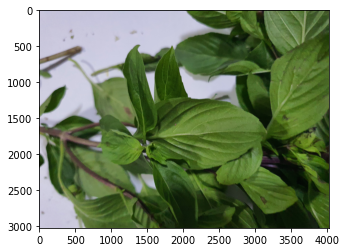

In [7]:
#plt.axis('off')
plt.imshow(img);

In [8]:
# Split into  Train and Test set (80:20) 
splitfolders.ratio('dataset', output="./", seed=None, ratio=(0.8,0.0,0.2)) # The spilt for validation set here is 0 since I will spilt the training set into train and validation again in later stage

Copying files: 535 files [00:06, 78.56 files/s]


## Convert image into Tensor

In [9]:
def convert_to_grayscale(images):

  tensor=   tf.cast(tf.expand_dims(images, 0), tf.float32)

  return tensor

tensor_img = convert_to_grayscale(img)

## Apply data augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


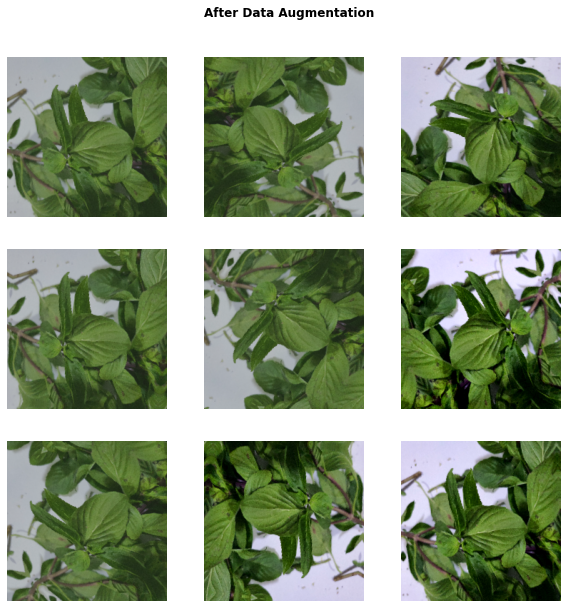

In [10]:
from keras.backend import tile
from keras import layers

augmentation_layer = tf.keras.Sequential([   
     layers.RandomFlip("horizontal_and_vertical", seed=None), 
     layers.RandomRotation(0.5, seed=None), 
     layers.RandomContrast(factor=0.3, seed=None),  
     #layers.RandomZoom(0.2,0.2)
])  

layer =  tf.keras.Sequential([
       layers.Resizing(224, 224),
       layers.Rescaling(1./255),   
       augmentation_layer                
])
plt.figure(figsize=(10, 10))
plt.suptitle('After Data Augmentation',weight="bold", x=0.52,y=0.95)

for i in range(9):
  augmented_image = layer(tensor_img)
  ax = plt.subplot(3, 3, i + 1)
  
  plt.imshow(augmented_image[0])
  plt.axis("off")

## Load data from directory

In [20]:
from tensorflow.keras.utils import image_dataset_from_directory
#color mode
colour_mode = 'rgb'
#image size
image_size = (224, 224)
#batch size
batch_size = 8
input_shape=(None,224,224,3)


train_dataset = image_dataset_from_directory(
  'train',
  color_mode=colour_mode,
  validation_split=0.2,
  subset='training',
  seed=42,
  label_mode='binary',  
  image_size=image_size,
  batch_size=batch_size)



validation_dataset = image_dataset_from_directory(
  'train',
  color_mode=colour_mode,
  validation_split=0.2,
  subset='validation',
  seed=42,
  label_mode='binary',  
  image_size=image_size,
  batch_size=batch_size)

test_dataset = image_dataset_from_directory(
  'test',
  shuffle=False,   
  color_mode=colour_mode,
  image_size=image_size,
  batch_size=1) 


print('Train label names:', train_dataset.class_names)
print('Test label names (empty):', test_dataset.class_names)



Found 427 files belonging to 2 classes.
Using 342 files for training.
Found 427 files belonging to 2 classes.
Using 85 files for validation.
Found 108 files belonging to 2 classes.
Train label names: ['horapa', 'kaprao']
Test label names (empty): ['horapa', 'kaprao']


In [23]:
from keras.models import Sequential
from keras.layers import Rescaling
from keras import layers
from keras.layers import Dense, Conv2D, Flatten , MaxPooling2D ,Dropout , BatchNormalization
from keras import regularizers
model = Sequential([])
# normalize an image
model.add(Rescaling(1./255))
# apply data augmentation
model.add(augmentation_layer)
# Enter Convolutional Layer
model.add(Conv2D(8, kernel_size=(3, 3), activation="relu", strides=(2,2), input_shape=input_shape))
model.add(Conv2D(8, kernel_size=(3, 3), activation="relu",strides=(2,2)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(16, kernel_size=(3, 3), activation="relu",strides=(2,2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation="relu",strides=(2,2)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
# Enter Fully COnnected Layers
model.add(Dense(32, kernel_regularizer=regularizers.l2(l2=0.01), bias_regularizer=regularizers.l2(l2=0.01),activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, kernel_regularizer=regularizers.l2(l2=0.01), bias_regularizer=regularizers.l2(l2=0.01),activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
model.build(input_shape)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 sequential_4 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 111, 111, 8)       224       
                                                                 
 conv2d_13 (Conv2D)          (None, 55, 55, 8)         584       
                                                                 
 batch_normalization_4 (Batc  (None, 55, 55, 8)        32        
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 27, 8)        0         
 2D)                                                  

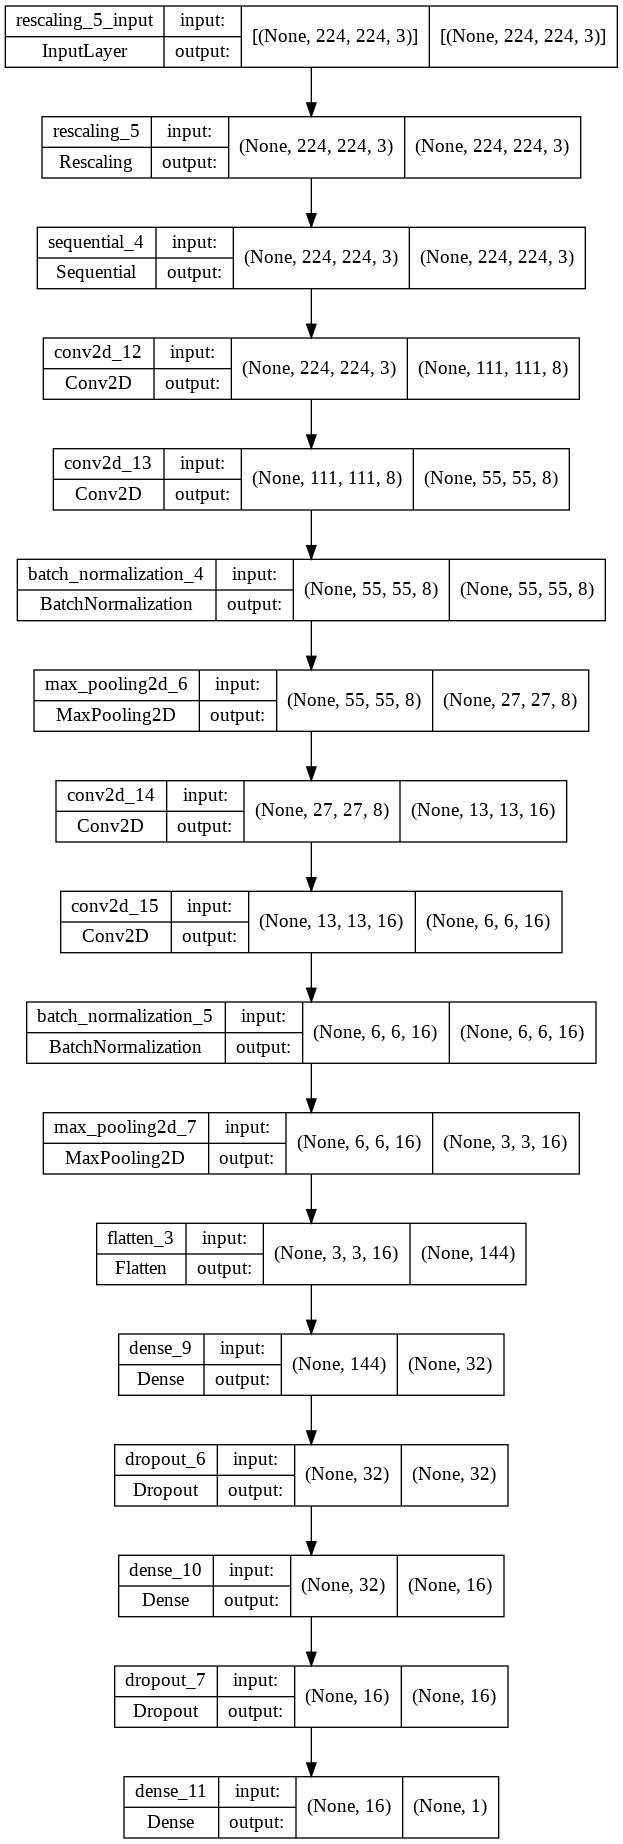

In [35]:
dot_img_file = '/tmp/model_1.png'

tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)


## Train Model

In [24]:
model.fit(train_dataset, validation_data=validation_dataset, epochs=30)

Epoch 1/30
43/43 [==============================] - 14s 251ms/step - loss: 1.5596 - accuracy: 0.6257 - val_loss: 1.3491 - val_accuracy: 0.8353
Epoch 2/30
43/43 [==============================] - 12s 241ms/step - loss: 1.2884 - accuracy: 0.7632 - val_loss: 1.3071 - val_accuracy: 0.8588
Epoch 3/30
43/43 [==============================] - 12s 240ms/step - loss: 1.1632 - accuracy: 0.7924 - val_loss: 1.2593 - val_accuracy: 0.8588
Epoch 4/30
43/43 [==============================] - 12s 242ms/step - loss: 1.1443 - accuracy: 0.8041 - val_loss: 1.2095 - val_accuracy: 0.8588
Epoch 5/30
43/43 [==============================] - 12s 241ms/step - loss: 1.0925 - accuracy: 0.8070 - val_loss: 1.1363 - val_accuracy: 0.8588
Epoch 6/30
43/43 [==============================] - 12s 240ms/step - loss: 0.9970 - accuracy: 0.8129 - val_loss: 1.1099 - val_accuracy: 0.8588
Epoch 7/30
43/43 [==============================] - 12s 243ms/step - loss: 0.9685 - accuracy: 0.8246 - val_loss: 1.0857 - val_accuracy: 0.8588

## Predict Test dataset

In [25]:
pred = model.predict(test_dataset)

In [109]:
# Convert probabilities to labels
y_pred= ['kaprao' if prediction > 0.5 else 'horapa' for prediction in pred]


In [110]:
# File path of test set
test_path = test_dataset.file_paths

def get_y_label(test_path):

  y_true =[]
  for label in test_path:
      if 'horapa' in label:
        y_true.append('horapa')
      else:
        y_true.append('kaprao')
  return y_true

# get true label of the test set
y_true = get_y_label(test_path)

In [146]:
import seaborn as sns
sns.set_theme()

# compare the prediction result wiht true label and calculate accuracy
def prediction_accuracy(y_pred,y_true,pred,test_path):
  correct =0
  wrong  = 0
  count =0 
  for x,y in zip(y_pred,y_true):

    if x == y:
      correct+=1
      count+=1
    else:

      y_prob = pred[count]
      
      if y_prob > 0.5:

        true_label =  1-y_prob
        pred_label = y_prob
        true_title = 'Horapa'
        pred_title = 'Kaprao'
      else:
        true_label = y_prob
        pred_label = 1-y_prob
        true_title = 'Kaprao'
        pred_title = 'Kaprao'



      fig , (ax1,ax2)= plt.subplots(nrows=1,ncols=2 , figsize=(15,15))
      ax1.set_title(f'True Label {y} but predicted as {x}')
      ax1.axis('off')
      ax1.imshow(mpimg.imread(test_path[count]))


      ax2.pie([true_label,pred_label],autopct='%1.1f%%',colors=['g','r'])
      
      ax2.legend([true_title,pred_title])
      ax2.set_title(f'Probabilties from model predictions')
      
      wrong+=1
      count+=1

  accuracy = correct / float(len(y_pred))
  print(f'True predictions : {correct} ')
  print(f'False predictions : {wrong} '  )
  print(f'Prediction accuracy on test set : {accuracy * 100 } %')


  return None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


True predictions : 106 
False predictions : 2 
Prediction accuracy on test set : 98.14814814814815 %


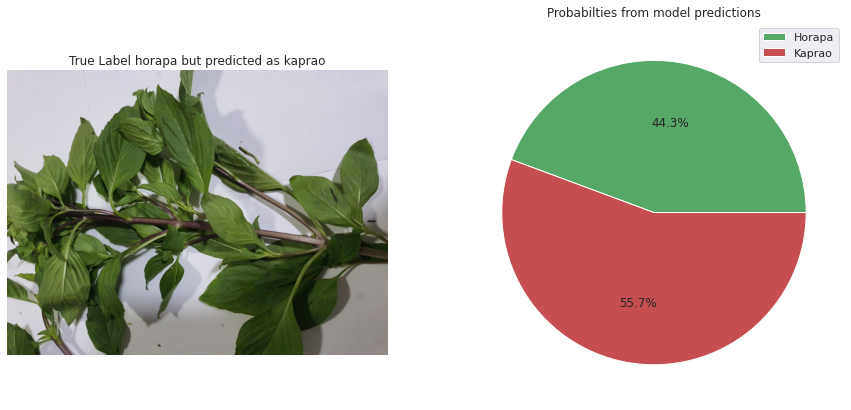

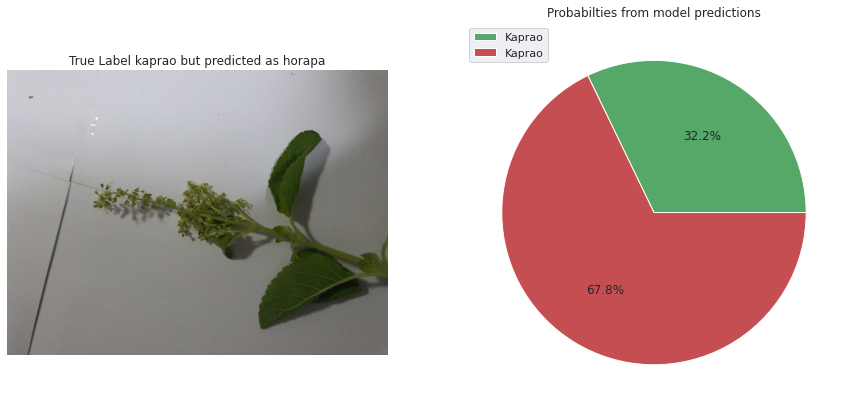

In [147]:
prediction_accuracy(y_pred,y_true,pred,test_path)

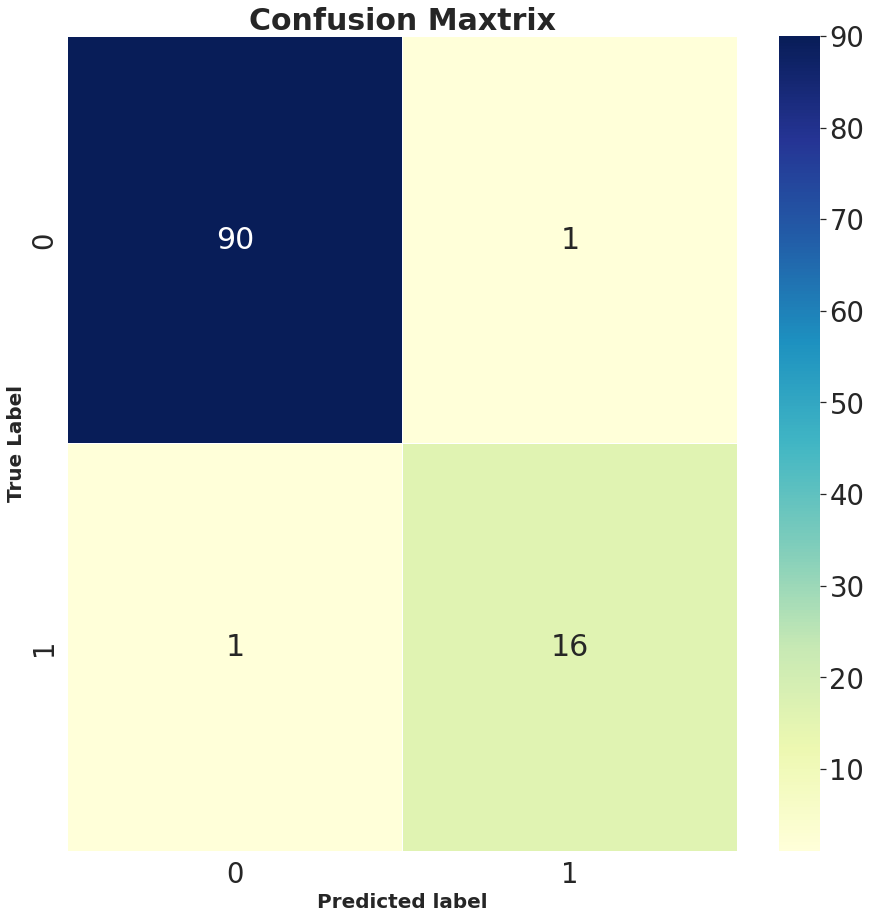

In [153]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true,y_pred)
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Confusion Maxtrix',size=30, weight="bold")

sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, ax=ax,cmap="YlGnBu")
sns.set(font_scale=2.5)
ax.set_ylabel('True Label',fontsize=20,fontweight='bold')
ax.set_xlabel('Predicted label',fontsize=20,fontweight='bold')
plt.show()

In [156]:
## Save Model
!mkdir save_model
model.save('./save_model')

INFO:tensorflow:Assets written to: ./save_model/assets


In [158]:
!zip -r model.zip ./save_model

updating: save_model/ (stored 0%)
updating: save_model/keras_metadata.pb (deflated 93%)
updating: save_model/variables/ (stored 0%)
updating: save_model/variables/variables.index (deflated 71%)
updating: save_model/variables/variables.data-00000-of-00001 (deflated 18%)
updating: save_model/saved_model.pb (deflated 90%)
updating: save_model/assets/ (stored 0%)


In [159]:
!ls

assets	     drive		model.zip	save_model  val
dataset      keras_metadata.pb	sample_data	test	    variables
dataset.zip  __MACOSX		saved_model.pb	train
